In [10]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


train_data = np.load('D:/HomeWork/Pattern/inputs/p4/train-ubyte.npz')
x_train, y_train = train_data['a'], train_data['b']

test_data = np.load('D:/HomeWork/Pattern/inputs/p4/test-ubyte.npz')
x_test, y_test = test_data['a'], test_data['b']

class_names = ['cloud', 'sun', 'pants', 'umbrella', 'table', 'ladder', 'eyeglasses', 'clock', 'scissors', 'cup']

In [11]:
x_train = x_train.reshape(80000 , 784)
pca = PCA(n_components=20)
pca.fit(x_train)
W = pca.components_

In [12]:
W.shape

(20, 784)

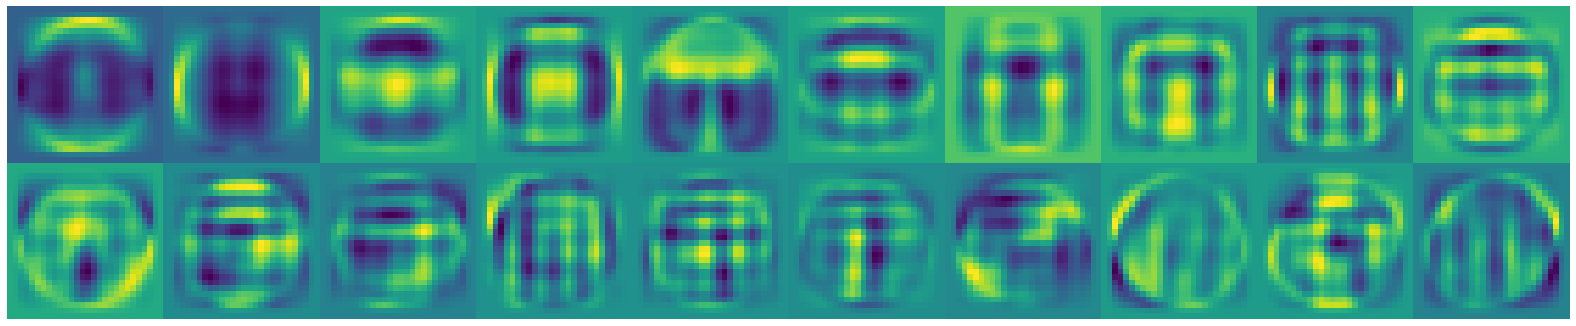

In [13]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(28, 28))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 10),  # creates 5x10 grid of axes
                 axes_pad=0,  # pad between axes in inch.
                 )

for ax, im in zip(grid, W):
    # Iterating over the grid returns the Axes.
    ax.imshow(im.reshape(28 , 28))
    ax.axis('off')
plt.show()

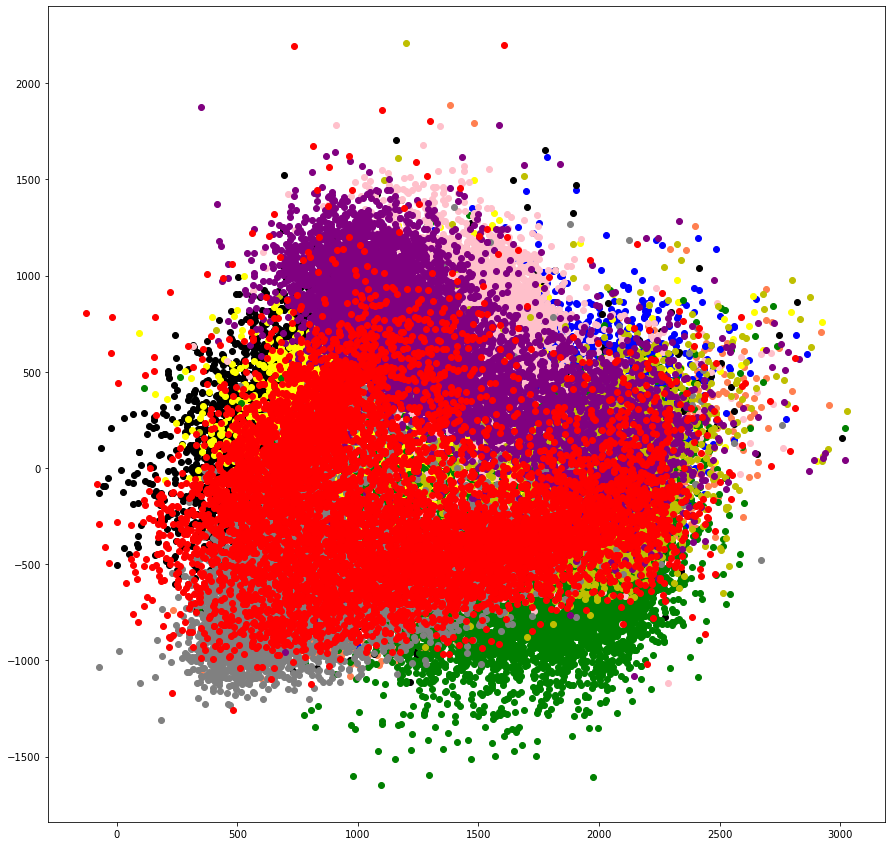

In [8]:
class_labels = np.unique(y_train)
colors = ['coral' , 'blue' , 'black' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'red']
fig = plt.figure(figsize = (15 , 15))
ax = fig.add_subplot()
for c in range(len(class_labels)):
    X_c = x_train[y_train == class_labels[c]]
    k = (np.real(W[0])).dot(X_c.T)
    f = (np.real(W[1])).dot(X_c.T)
    ax.scatter(k, f, marker='o', color=colors[c])

plt.show()

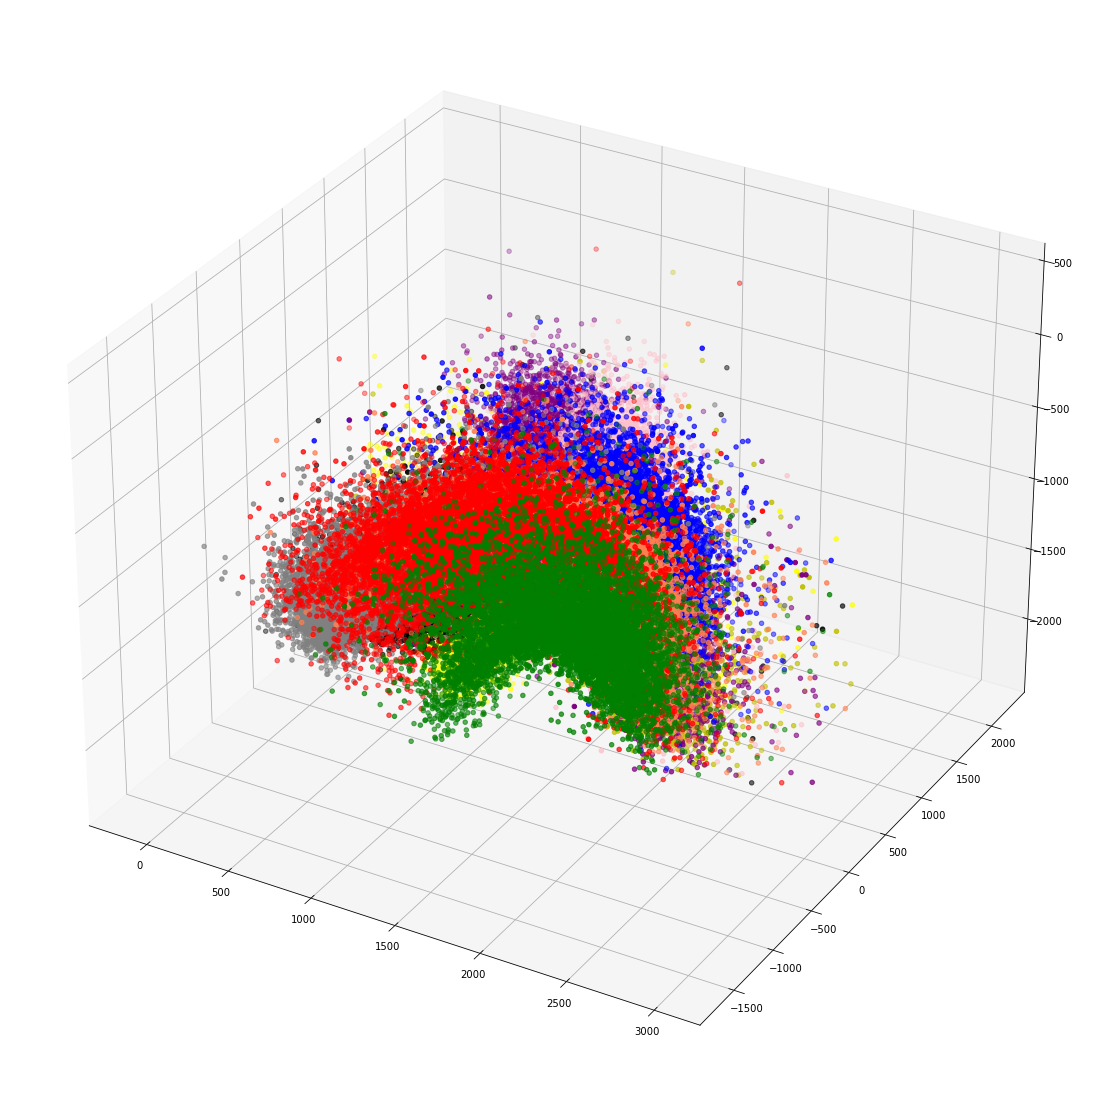

In [83]:
colors = ['coral' , 'blue' , 'black' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'red']
fig = plt.figure(figsize = (20 , 20))
ax = fig.add_subplot(projection='3d')
for c in range(len(class_labels)):
    X_c = x_train[y_train == class_labels[c]]
    k = (np.real(W[0])).dot(X_c.T)
    f = (np.real(W[1])).dot(X_c.T)
    z = (np.real(W[2])).dot(X_c.T)
    ax.scatter(k, f, z, marker='o', color=colors[c])

plt.show()

In [205]:
#Question C

In [14]:
#f for class 0 and s for class 1
def kmeanscluster(X , k , mu , tol , maxIter):
    iteration = 0
    SSE = 100
    finalCenters = 0
    while iteration < maxIter and tol < SSE:
        
        newSSE = 0
        
        
        newDatas = list()
        
        for item in range(k):
            dist = []
            for i in range(len(X)):
                dist.append(np.linalg.norm(X[i] - mu[:, item:item+1].reshape(len(mu))))
            newDatas.append(np.array(dist))
            
        
        newLabels = np.argmin(np.array(newDatas), axis=0)
        
        finalCenters = mu
        
        means = list()
        for item in range(k):
            arrangedData = []
            for i in range(len(X)):
                if newLabels[i] == item:
                    arrangedData.append(X[i])
            data = np.array(arrangedData)
            newSSE = newSSE + np.sum((data - mu[:, item:item+1].reshape(len(mu)))**2)
            meanData = data.mean(axis = 0)
            means.append(meanData)
        
        meansArray = []

        for i in range(len(means)-1, -1, -1):
            meansArray = [y for x in [meansArray, means[i]] for y in x]
        mu = np.reshape(meansArray, (len(means[0]), k), order='F')
        
        iteration = iteration + 1
        SSE = newSSE
        
        acc = accuracy_score(y_train, newLabels)
        
        print("Accuracy for iteration " , iteration , " is " , acc)
        
        
    return newLabels , SSE , finalCenters

Accuracy for iteration  1  is  0.1030875
Accuracy for iteration  2  is  0.190975
Accuracy for iteration  3  is  0.088725
Accuracy for iteration  4  is  0.185625
Accuracy for iteration  5  is  0.061625
Accuracy for iteration  6  is  0.1786375
Accuracy for iteration  7  is  0.0567
Accuracy for iteration  8  is  0.1782
Accuracy for iteration  9  is  0.056075
Accuracy for iteration  10  is  0.17835
Accuracy for iteration  11  is  0.056
Accuracy for iteration  12  is  0.1785125
Accuracy for iteration  13  is  0.056
Accuracy for iteration  14  is  0.1785625
Accuracy for iteration  15  is  0.0559625
Accuracy for iteration  16  is  0.17855
Accuracy for iteration  17  is  0.05595
Accuracy for iteration  18  is  0.17855
Accuracy for iteration  19  is  0.05595
Accuracy for iteration  20  is  0.17855


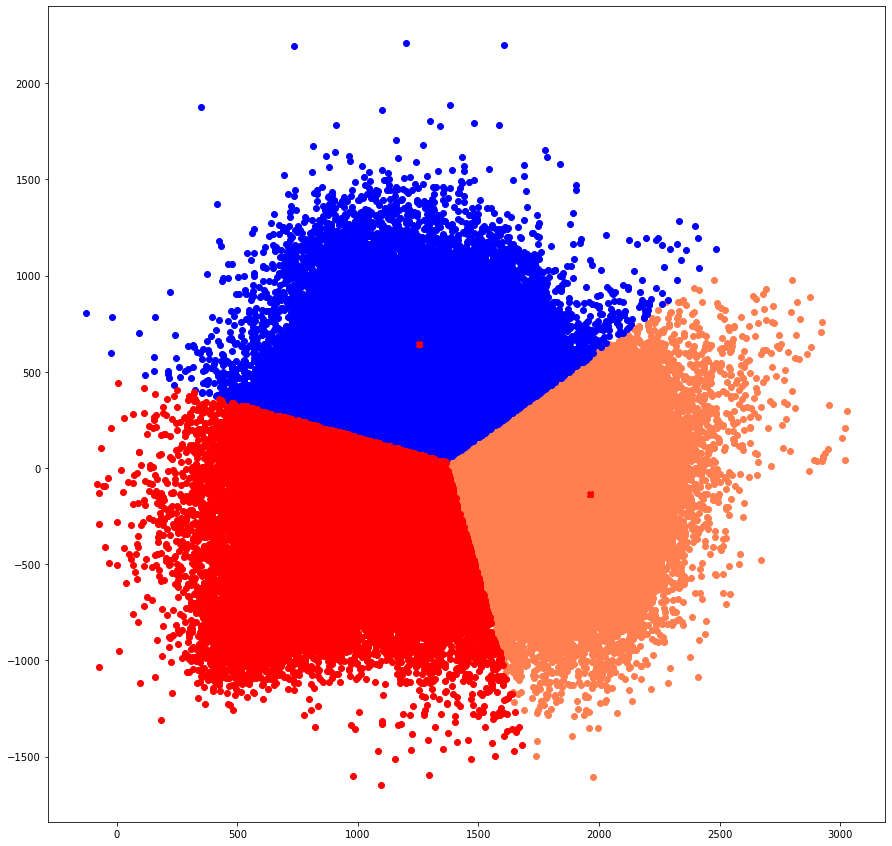

In [16]:
#for K = 3
q = (np.real(W[0])).dot(x_train.T)
b = (np.real(W[1])).dot(x_train.T)


points = np.vstack((q, b)).T
mu = np.random.randint(-1200 , 1200 , size=(2 , 3))
f , SSE , finalCenters = kmeanscluster(points , 3 , mu , 1 , 20 )

colors = ['coral' , 'blue' , 'red' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'black']
fig = plt.figure(figsize = (15 , 15))
ax = fig.add_subplot()
for c in range(3):
    x = list()
    y = list()

    for i in range(len(points)):
        if f[i] == c:
            x.append(points[i][0])
            y.append(points[i][1])
    ax.scatter(x, y, marker='o', color=colors[c])
    
    mu_x = list()
    mu_y = list()
    for i in range(0,3):
        mu_x.append(finalCenters[0][i])
        mu_y.append(finalCenters[1][i])
        
    
    ax.plot(mu_x,mu_y , linestyle='', marker='X' , color = 'red')

plt.show()

Accuracy for iteration  1  is  0.1025375
Accuracy for iteration  2  is  0.0606625
Accuracy for iteration  3  is  0.08005
Accuracy for iteration  4  is  0.059975
Accuracy for iteration  5  is  0.081475
Accuracy for iteration  6  is  0.0626875
Accuracy for iteration  7  is  0.082725
Accuracy for iteration  8  is  0.0637125
Accuracy for iteration  9  is  0.084175
Accuracy for iteration  10  is  0.06425
Accuracy for iteration  11  is  0.0853
Accuracy for iteration  12  is  0.0644
Accuracy for iteration  13  is  0.086475
Accuracy for iteration  14  is  0.0643125
Accuracy for iteration  15  is  0.087825
Accuracy for iteration  16  is  0.0645
Accuracy for iteration  17  is  0.0893125
Accuracy for iteration  18  is  0.064775
Accuracy for iteration  19  is  0.090525
Accuracy for iteration  20  is  0.0648


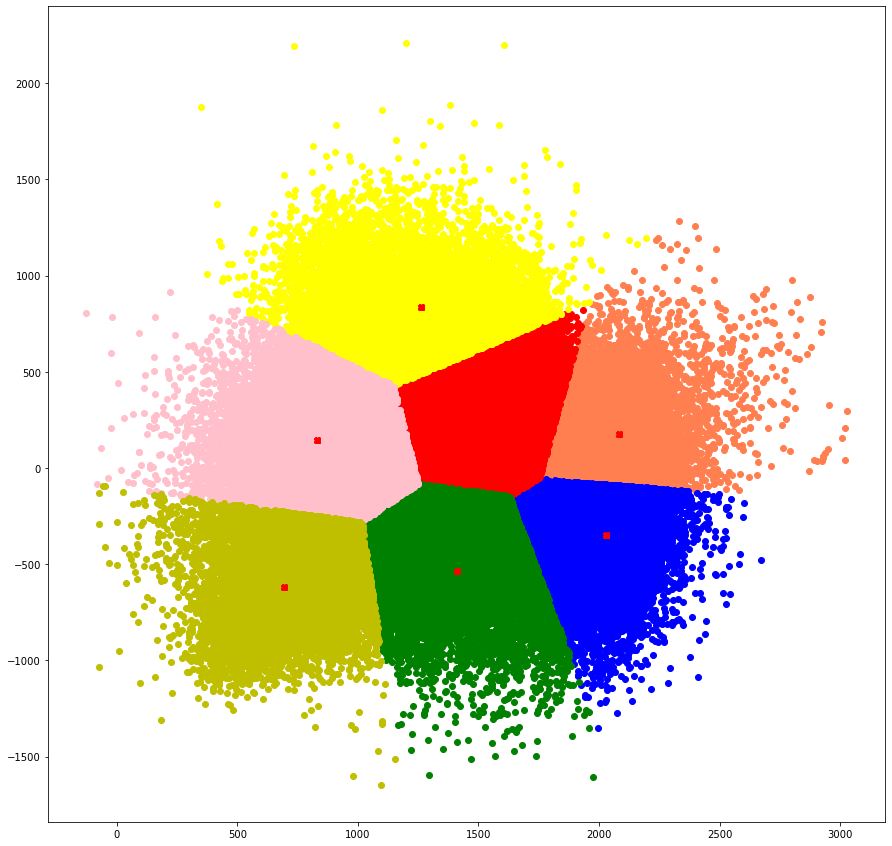

In [18]:
#for K = 7
q = (np.real(W[0])).dot(x_train.T)
b = (np.real(W[1])).dot(x_train.T)


points = np.vstack((q, b)).T
mu = np.array([[700 , 700 , 1200 , 1000 , 1500 , 2000 , 2000],[-700, 0  , -500 , 500 , 0 , -500 , 500]])
f , SSE , finalCenters = kmeanscluster(points , 7 , mu , 1 , 20 )

colors = ['coral' , 'blue' , 'red' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'black']
fig = plt.figure(figsize = (15 , 15))
ax = fig.add_subplot()
for c in range(7):
    x = list()
    y = list()

    for i in range(len(points)):
        if f[i] == c:
            x.append(points[i][0])
            y.append(points[i][1])
    ax.scatter(x, y, marker='o', color=colors[c])
    
    mu_x = list()
    mu_y = list()
    for i in range(0,7):
        mu_x.append(finalCenters[0][i])
        mu_y.append(finalCenters[1][i])
        
    
    ax.plot(mu_x,mu_y , linestyle='', marker='X' , color = 'red')

plt.show()

Accuracy for iteration  1  is  0.06025
Accuracy for iteration  2  is  0.2082625
Accuracy for iteration  3  is  0.0704625
Accuracy for iteration  4  is  0.19625
Accuracy for iteration  5  is  0.074475
Accuracy for iteration  6  is  0.1819625
Accuracy for iteration  7  is  0.0796875
Accuracy for iteration  8  is  0.170425
Accuracy for iteration  9  is  0.0846875
Accuracy for iteration  10  is  0.1643875
Accuracy for iteration  11  is  0.0877625
Accuracy for iteration  12  is  0.1606375
Accuracy for iteration  13  is  0.0894625
Accuracy for iteration  14  is  0.1589875
Accuracy for iteration  15  is  0.0898375
Accuracy for iteration  16  is  0.1583125
Accuracy for iteration  17  is  0.0899
Accuracy for iteration  18  is  0.1587
Accuracy for iteration  19  is  0.0896875
Accuracy for iteration  20  is  0.159225


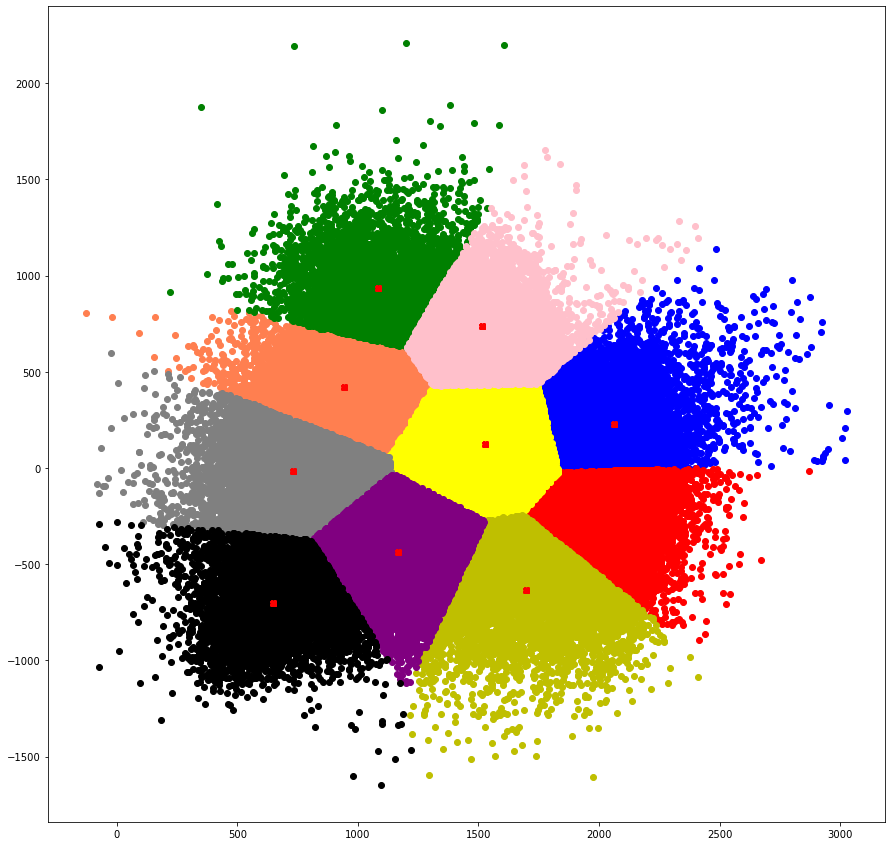

In [19]:
#for K = 10
q = (np.real(W[0])).dot(x_train.T)
b = (np.real(W[1])).dot(x_train.T)


points = np.vstack((q, b)).T
mu = np.array([[70 , 700 , 700 , 1200 , 1000 , 700 , 1000 , 2000 , 2000 , 500],[-1000, -200 ,0  , -500 , 1000 , 1500 , 0 , -500 , 500 ,500]])
f , SSE , finalCenters = kmeanscluster(points , 10 , mu , 1 , 20 )

colors = ['coral' , 'blue' , 'red' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'black']
fig = plt.figure(figsize = (15 , 15))
ax = fig.add_subplot()
for c in range(10):
    x = list()
    y = list()

    for i in range(len(points)):
        if f[i] == c:
            x.append(points[i][0])
            y.append(points[i][1])
    ax.scatter(x, y, marker='o', color=colors[c])
    
    mu_x = list()
    mu_y = list()
    for i in range(0,10):
        mu_x.append(finalCenters[0][i])
        mu_y.append(finalCenters[1][i])
        
    
    ax.plot(mu_x,mu_y , linestyle='', marker='X' , color = 'red')

plt.show()

In [104]:
#Question D

Accuracy for iteration  1  is  0.24675
Accuracy for iteration  2  is  0.1096125
Accuracy for iteration  3  is  0.208425
Accuracy for iteration  4  is  0.11635
Accuracy for iteration  5  is  0.1651875
Accuracy for iteration  6  is  0.1157875
Accuracy for iteration  7  is  0.13195
Accuracy for iteration  8  is  0.1177875
Accuracy for iteration  9  is  0.11735
Accuracy for iteration  10  is  0.1192125
Accuracy for iteration  11  is  0.1114
Accuracy for iteration  12  is  0.11975
Accuracy for iteration  13  is  0.109275
Accuracy for iteration  14  is  0.119775
Accuracy for iteration  15  is  0.1084375
Accuracy for iteration  16  is  0.1199875
Accuracy for iteration  17  is  0.1081
Accuracy for iteration  18  is  0.1199875
Accuracy for iteration  19  is  0.10795
Accuracy for iteration  20  is  0.1200375


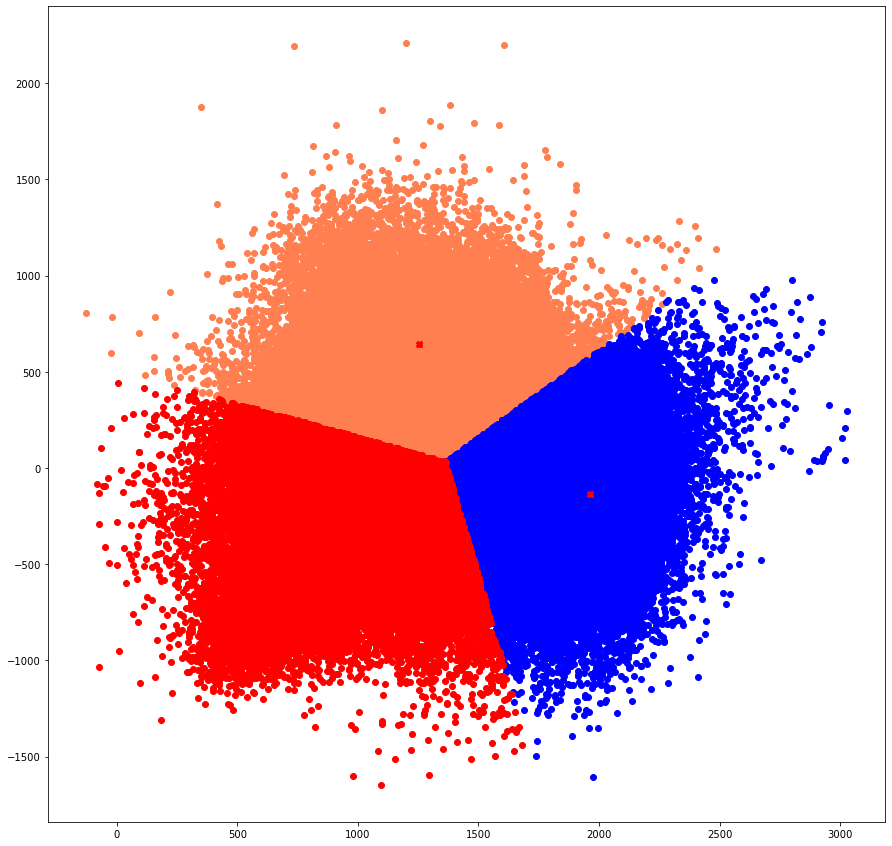

In [21]:
counts = np.zeros(3)
sumAll = np.zeros((3 , 2))
avg = np.zeros((3 , 2))
muuu = np.zeros(3)
kk = list()
for c in range(len(class_labels)):
    X_c = points[y_train == class_labels[c]]
    if class_labels[c] == 0 or class_labels[c] == 2 or class_labels[c] == 4 or class_labels[c] == 6 :
        kk.append(X_c)
        counts[0] = counts[0] + len(X_c)
        sumAll[0] = sumAll[0] + sum(X_c)
        avg[0] = avg[0] + (sumAll[0] / counts[0])
    elif class_labels[c] == 1 or class_labels[c] == 3 :
        counts[1] = counts[1] + len(X_c)
        sumAll[1] = sumAll[1] + sum(X_c)
        avg[1] = avg[1] + (sumAll[1] / counts[1])
    elif class_labels[c] == 5 or class_labels[c] == 7 or class_labels[c] == 8 or class_labels[c] == 9 :
        counts[2] = counts[2] + len(X_c)
        sumAll[2] = sumAll[2] + sum(X_c)
        avg[2] = avg[2] + (sumAll[2] / counts[2])
        
mu = list()
for i in range(len(avg[0])):
    h = [avg[0][i] / 4 , avg[1][i] / 2 , avg[2][i] / 4]
    mu.append(h)

mu = np.array(mu)
#for K = 3
q = (np.real(W[0])).dot(x_train.T)
b = (np.real(W[1])).dot(x_train.T)


points = np.vstack((q, b)).T
# mu = np.array([[700 , 10 , 1200],[1700,-500 , 1000]])
f , SSE , finalCenters = kmeanscluster(points , 3 , mu , 1 , 20 )

colors = ['coral' , 'blue' , 'red' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'black']
fig = plt.figure(figsize = (15 , 15))
ax = fig.add_subplot()
for c in range(3):
    x = list()
    y = list()

    for i in range(len(points)):
        if f[i] == c:
            x.append(points[i][0])
            y.append(points[i][1])
    ax.scatter(x, y, marker='o', color=colors[c])
    
    mu_x = list()
    mu_y = list()
    for i in range(0,3):
        mu_x.append(finalCenters[0][i])
        mu_y.append(finalCenters[1][i])
        
    
    ax.plot(mu_x,mu_y , linestyle='', marker='X' , color = 'red')

plt.show()

Accuracy for iteration  1  is  0.0654375
Accuracy for iteration  2  is  0.0917125
Accuracy for iteration  3  is  0.0648125
Accuracy for iteration  4  is  0.09085
Accuracy for iteration  5  is  0.0635875
Accuracy for iteration  6  is  0.0876125
Accuracy for iteration  7  is  0.0634375
Accuracy for iteration  8  is  0.0861875
Accuracy for iteration  9  is  0.063425
Accuracy for iteration  10  is  0.084775
Accuracy for iteration  11  is  0.0637375
Accuracy for iteration  12  is  0.0835
Accuracy for iteration  13  is  0.0646375
Accuracy for iteration  14  is  0.0823875
Accuracy for iteration  15  is  0.0654625
Accuracy for iteration  16  is  0.080775
Accuracy for iteration  17  is  0.0663875
Accuracy for iteration  18  is  0.0784375
Accuracy for iteration  19  is  0.0669125
Accuracy for iteration  20  is  0.0762625


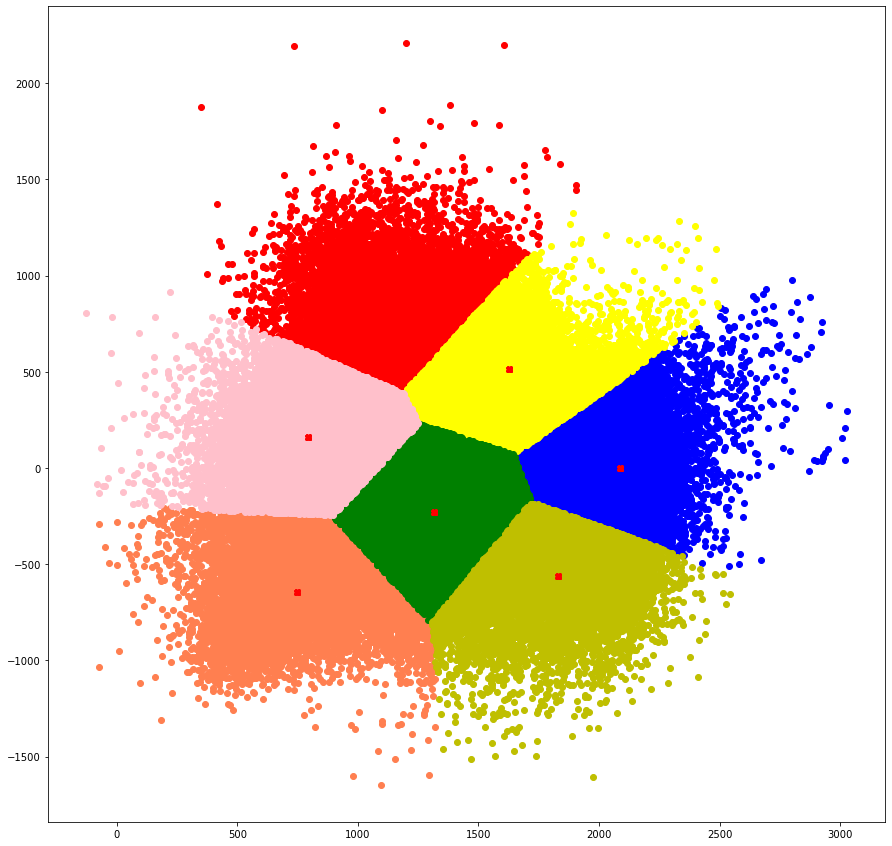

In [22]:
counts = np.zeros(7)
sumAll = np.zeros((7 , 2))
avg = np.zeros((7 , 2))
for c in range(len(class_labels)):
    X_c = points[y_train == class_labels[c]]
    if class_labels[c] == 0 or class_labels[c] == 1 or class_labels[c] == 4 :
        counts[0] = counts[0] + len(X_c)
        sumAll[0] = sumAll[0] + sum(X_c)
        avg[0] = avg[0] + (sumAll[0] / counts[0])
    elif class_labels[c] == 2 :
        counts[1] = counts[1] + len(X_c)
        sumAll[1] = sumAll[1] + sum(X_c)
        avg[1] = avg[1] + (sumAll[1] / counts[1])
    elif class_labels[c] == 3:
        counts[2] = counts[2] + len(X_c)
        sumAll[2] = sumAll[2] + sum(X_c)
        avg[2] = avg[2] + (sumAll[2] / counts[2])
    elif class_labels[c] == 5:
        counts[3] = counts[3] + len(X_c)
        sumAll[3] = sumAll[3] + sum(X_c)
        avg[3] = avg[3] + (sumAll[3] / counts[3])
    elif class_labels[c] == 8:
        counts[4] = counts[4] + len(X_c)
        sumAll[4] = sumAll[4] + sum(X_c)
        avg[4] = avg[4] + (sumAll[4] / counts[4])
    elif class_labels[c] == 6:
        counts[5] = counts[5] + len(X_c)
        sumAll[5] = sumAll[5] + sum(X_c)
        avg[5] = avg[5] + (sumAll[5] / counts[5])
    elif class_labels[c] == 7 or class_labels[c] == 9 :
        counts[6] = counts[6] + len(X_c)
        sumAll[6] = sumAll[6] + sum(X_c)
        avg[6] = avg[6] + (sumAll[6] / counts[6])
        
mu = list()
for i in range(len(avg[0])):
    h = [avg[0][i] / 3 , avg[1][i] / 1 , avg[2][i] / 1,avg[3][i] / 1 , avg[4][i] / 1 , avg[5][i] / 1 ,avg[6][i] / 3 ]
    mu.append(h)

mu = np.array(mu)
#for K = 7
q = (np.real(W[0])).dot(x_train.T)
b = (np.real(W[1])).dot(x_train.T)


points = np.vstack((q, b)).T
# mu = np.array([[700 , 10 , 1200],[1700,-500 , 1000]])
f , SSE , finalCenters = kmeanscluster(points , 7 , mu , 1 , 20 )

colors = ['coral' , 'blue' , 'red' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'black']
fig = plt.figure(figsize = (15 , 15))
ax = fig.add_subplot()
for c in range(7):
    x = list()
    y = list()

    for i in range(len(points)):
        if f[i] == c:
            x.append(points[i][0])
            y.append(points[i][1])
    ax.scatter(x, y, marker='o', color=colors[c])
    
    
    mu_x = list()
    mu_y = list()
    for i in range(0,7):
        mu_x.append(finalCenters[0][i])
        mu_y.append(finalCenters[1][i])
        
    
    ax.plot(mu_x,mu_y , linestyle='', marker='X' , color = 'red')
    

plt.show()

Accuracy for iteration  1  is  0.4776625
Accuracy for iteration  2  is  0.0578125
Accuracy for iteration  3  is  0.483225
Accuracy for iteration  4  is  0.0561
Accuracy for iteration  5  is  0.4813
Accuracy for iteration  6  is  0.055825
Accuracy for iteration  7  is  0.480125
Accuracy for iteration  8  is  0.0556625
Accuracy for iteration  9  is  0.4793625
Accuracy for iteration  10  is  0.05575
Accuracy for iteration  11  is  0.4791875
Accuracy for iteration  12  is  0.05595
Accuracy for iteration  13  is  0.4786
Accuracy for iteration  14  is  0.0559625
Accuracy for iteration  15  is  0.47675
Accuracy for iteration  16  is  0.05585
Accuracy for iteration  17  is  0.47465
Accuracy for iteration  18  is  0.0559125
Accuracy for iteration  19  is  0.4724125


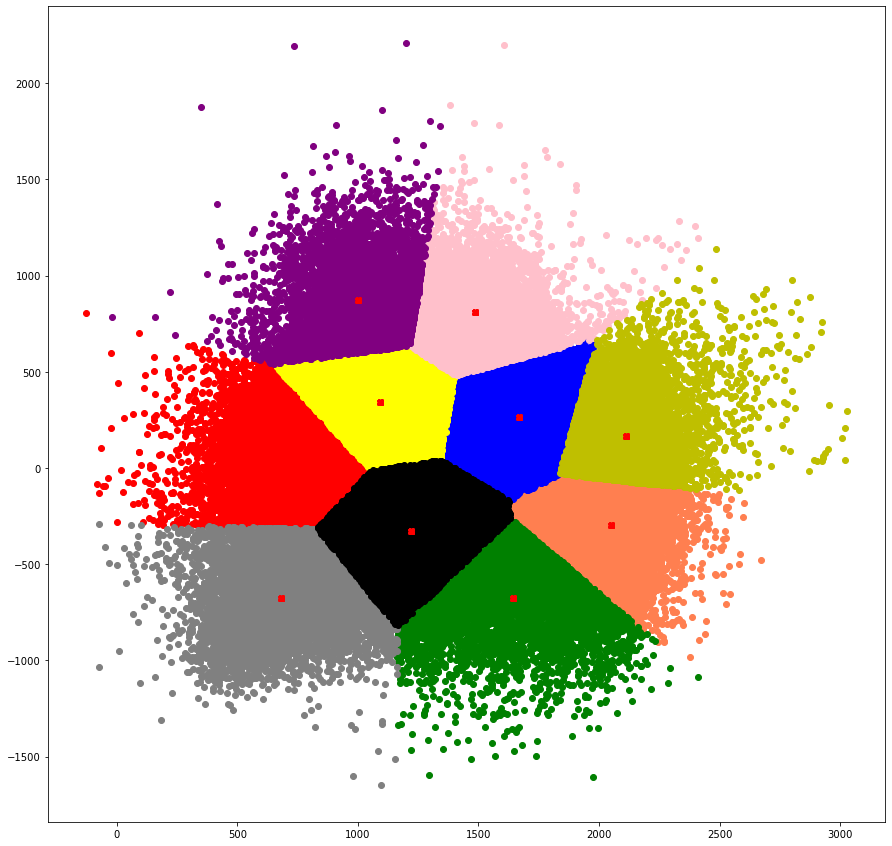

In [24]:
#for K = 10
q = (np.real(W[0])).dot(x_train.T)
b = (np.real(W[1])).dot(x_train.T)
points = np.vstack((q, b)).T

avg = np.zeros((10 , 2))
for c in range(len(class_labels)):
    X_c = points[y_train == class_labels[c]]
    avg[c] = X_c.mean(axis = 0)
        
mu = list()
for i in range(len(avg[0])):
    h = [avg[0][i] , avg[1][i] , avg[2][i] , avg[3][i] , avg[4][i] , avg[5][i] , avg[6][i] , avg[7][i] , avg[8][i] , avg[9][i] ]
    mu.append(h)

mu = np.array(mu)

f , SSE , finalCenters = kmeanscluster(points , 10 , mu , 1 , 19 )

colors = ['coral' , 'blue' , 'red' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'black']
fig = plt.figure(figsize = (15 , 15))
ax = fig.add_subplot()
for c in range(10):
    x = list()
    y = list()

    for i in range(len(points)):
        if f[i] == c:
            x.append(points[i][0])
            y.append(points[i][1])
    ax.scatter(x, y, marker='o', color=colors[c])
    
    
    mu_x = list()
    mu_y = list()
    for i in range(0,10):
        mu_x.append(finalCenters[0][i])
        mu_y.append(finalCenters[1][i])
        
    
    ax.plot(mu_x,mu_y , linestyle='', marker='X' , color = 'red')

plt.show()

In [211]:
#Question E

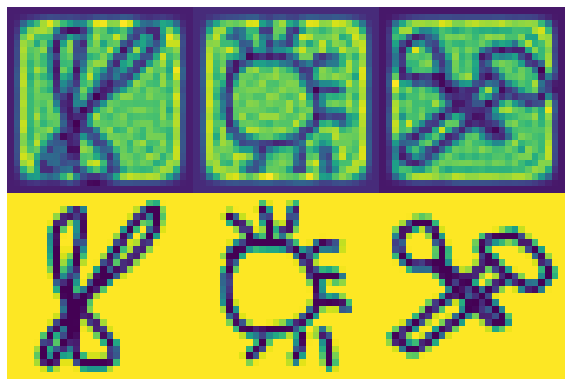

In [227]:
pca = PCA(n_components=273)
points = pca.fit_transform(x_train)
W = pca.components_

variance_ratio = sum(pca.explained_variance_ratio_)
variance_ratio


fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 3),  # creates 5x10 grid of axes
                 axes_pad=0,  # pad between axes in inch.
                 )
testData = np.random.randint(80000 , size=(3))
testData
im = list()
for data in testData :
    output = 0
    weight = 0
    for i in range(len(W)):
        weight = np.dot(x_train[data], W[i])
        output = output + W[i].reshape(28 , 28) * weight
    im.append(output)
    
for data in testData:
    im.append(x_train[data].reshape(28 , 28))

for ax, im in zip(grid, im):
    # Iterating over the grid returns the Axes.
    ax.imshow(im.reshape(28 , 28))
    ax.axis('off')
plt.show()


#original images is in bottom row

In [78]:
mu = np.random.randint(-700 , 700 , size=(273 , 10))

Accuracy for iteration  1  is  0.10705
Accuracy for iteration  2  is  0.215575
Accuracy for iteration  3  is  0.0447375
Accuracy for iteration  4  is  0.2312375
Accuracy for iteration  5  is  0.0225375
Accuracy for iteration  6  is  0.2142125
Accuracy for iteration  7  is  0.01895
Accuracy for iteration  8  is  0.2087875
Accuracy for iteration  9  is  0.0179625
Accuracy for iteration  10  is  0.208575
Accuracy for iteration  11  is  0.0176125
Accuracy for iteration  12  is  0.2087875
Accuracy for iteration  13  is  0.01755
Accuracy for iteration  14  is  0.2090125
Accuracy for iteration  15  is  0.01755
Accuracy for iteration  16  is  0.2093125
Accuracy for iteration  17  is  0.0175375
Accuracy for iteration  18  is  0.209475
Accuracy for iteration  19  is  0.017575
Accuracy for iteration  20  is  0.2094625


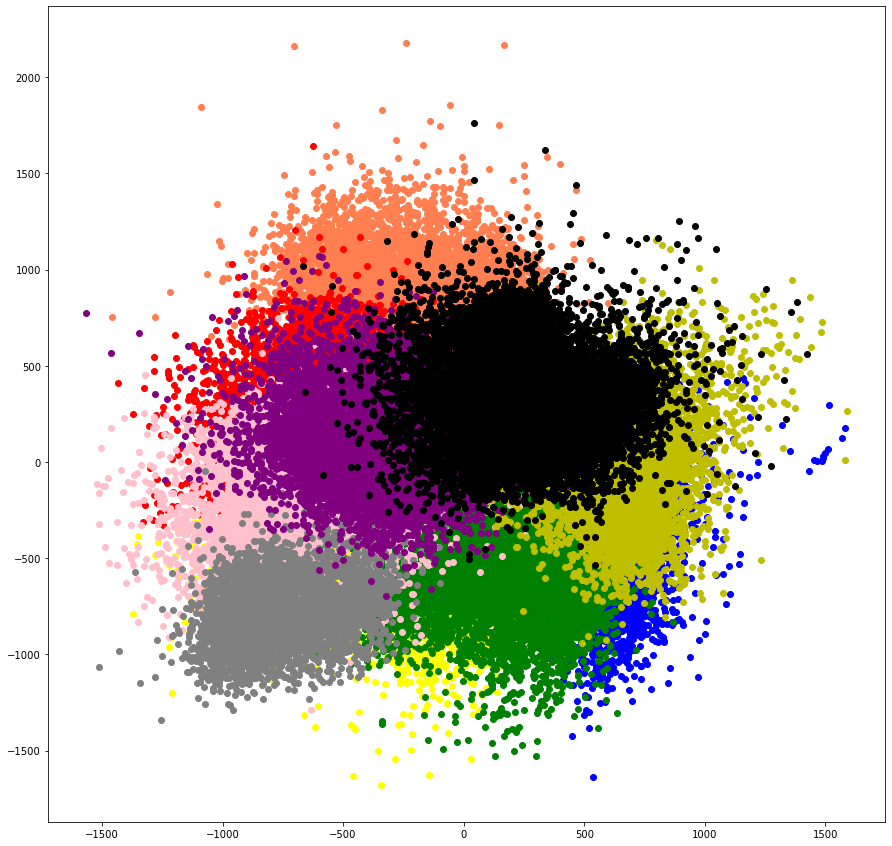

In [79]:
#for K = 10
f , SSE = kmeanscluster(points , 10 , mu , 1 , 20 )

colors = ['coral' , 'blue' , 'red' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'black']
fig = plt.figure(figsize = (15 , 15))
ax = fig.add_subplot()
for c in range(10):
    x = list()
    y = list()

    for i in range(len(points)):
        if f[i] == c:
            x.append(points[i][0])
            y.append(points[i][1])
    ax.scatter(x, y, marker='o', color=colors[c])

plt.show()

In [122]:
#Question F

In [231]:
mu = np.random.randint(-500 , 500 , size=(273 , 10))
f , SSE = kmeanscluster(points , 10 , mu , 1 , 31 )

Accuracy for iteration  1  is  0.077225
Accuracy for iteration  2  is  0.121475
Accuracy for iteration  3  is  0.0541
Accuracy for iteration  4  is  0.098
Accuracy for iteration  5  is  0.0628125
Accuracy for iteration  6  is  0.0942375
Accuracy for iteration  7  is  0.0627875
Accuracy for iteration  8  is  0.0904125
Accuracy for iteration  9  is  0.061725
Accuracy for iteration  10  is  0.089075
Accuracy for iteration  11  is  0.0599125
Accuracy for iteration  12  is  0.0907625
Accuracy for iteration  13  is  0.057825
Accuracy for iteration  14  is  0.0928375
Accuracy for iteration  15  is  0.0561
Accuracy for iteration  16  is  0.0948875
Accuracy for iteration  17  is  0.055025
Accuracy for iteration  18  is  0.096725
Accuracy for iteration  19  is  0.054725
Accuracy for iteration  20  is  0.0976125
Accuracy for iteration  21  is  0.05465
Accuracy for iteration  22  is  0.097575
Accuracy for iteration  23  is  0.054775
Accuracy for iteration  24  is  0.097075
Accuracy for iteration  

In [233]:
im = list()
for c in range(len(class_labels)):
    X_c = x_train[f == class_labels[c]]
    rand = np.random.randint(0 , 100 , size=(10 , 1))
    for data in rand :
        output = 0
        weight = 0
        for i in range(len(W)):
            weight = np.dot(X_c[data], W[i])
            output = output + W[i].reshape(28 , 28) * weight
        im.append(output)

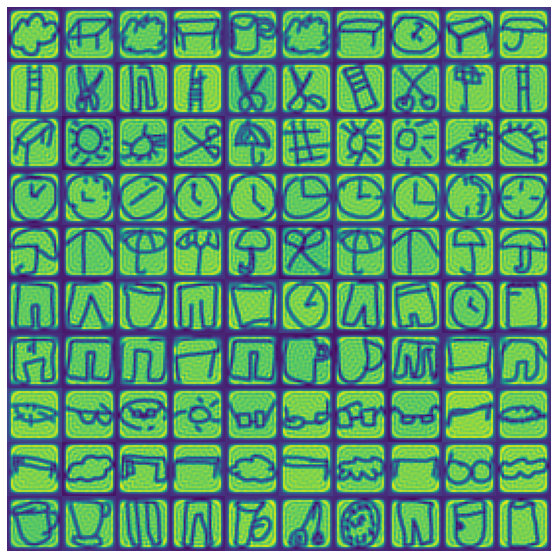

In [235]:
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(10, 10),  # creates 5x10 grid of axes
                 axes_pad=0,  # pad between axes in inch.
                 )
for ax, img in zip(grid, im):
    # Iterating over the grid returns the Axes.
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [246]:
#Question G

In [253]:
def all_indices(value, qlist):
    indices = []
    idx = -1
    while True:
        try:
            idx = qlist.index(value, idx+1)
            indices.append(idx)
        except ValueError:
            break
    return indices

In [265]:
indices = list()
for c in range(len(class_labels)):
    indices.append(all_indices(True , (f == class_labels[c]).tolist()))
    
cluster = list()
for index in range(len(indices)):
    eachCluster = list()
    for data in indices[index]:
        eachCluster.append(y_train[data])
    cluster.append(eachCluster)
    

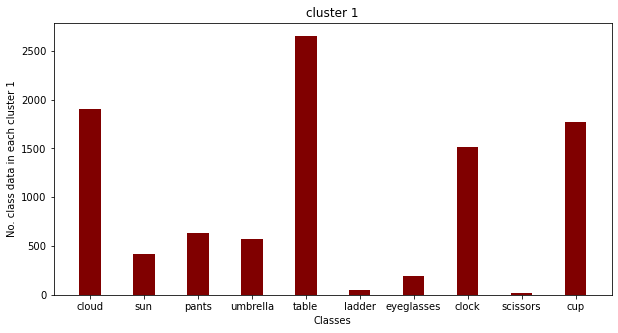

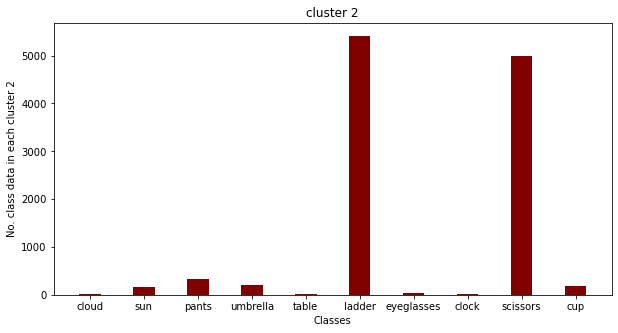

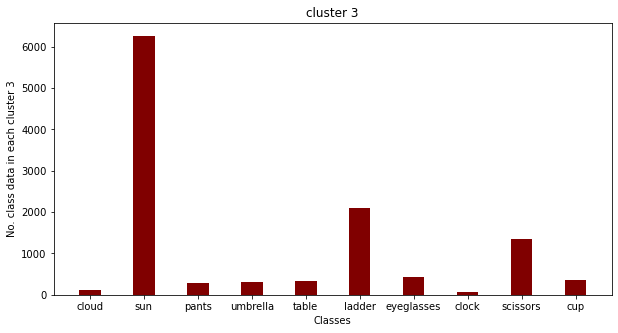

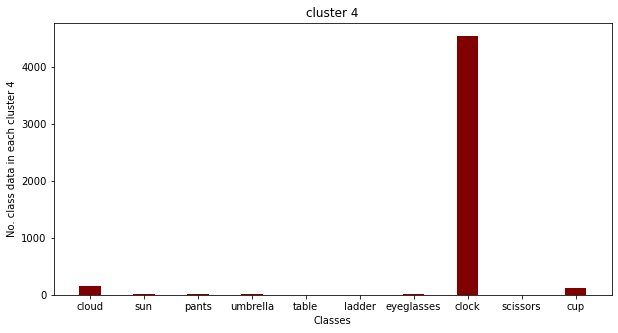

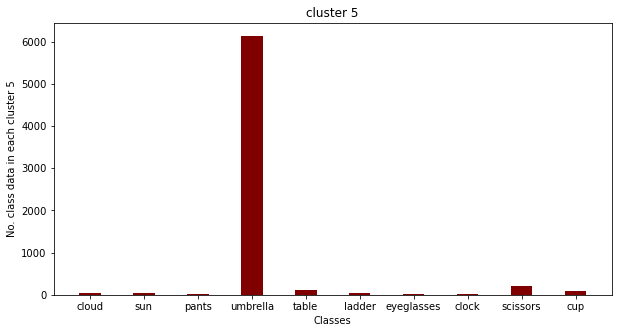

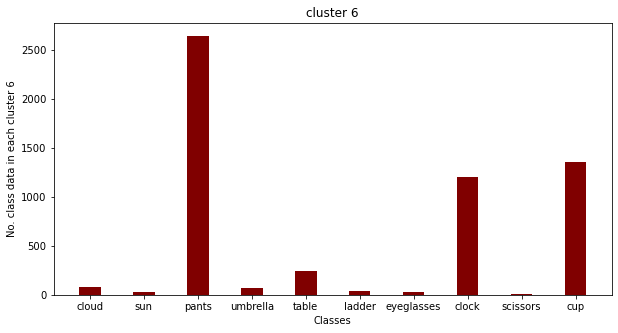

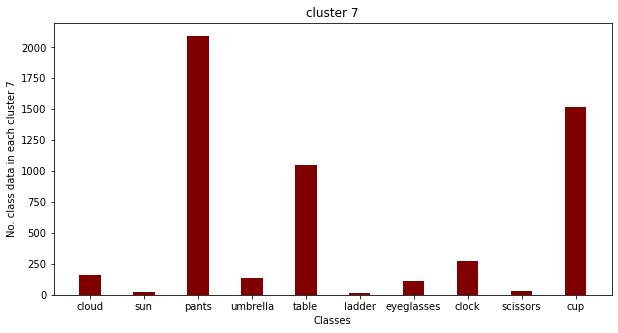

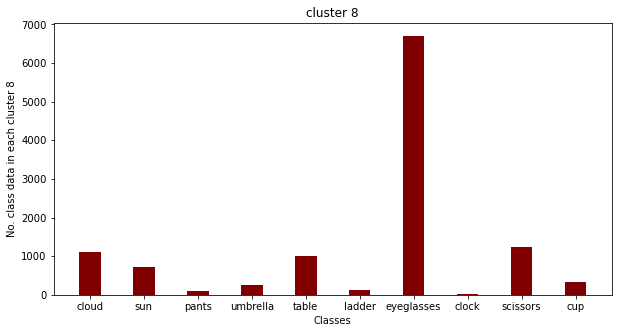

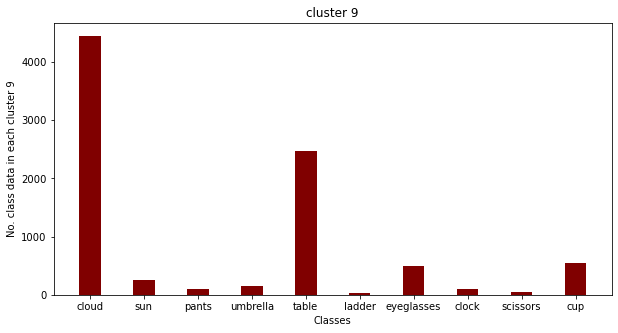

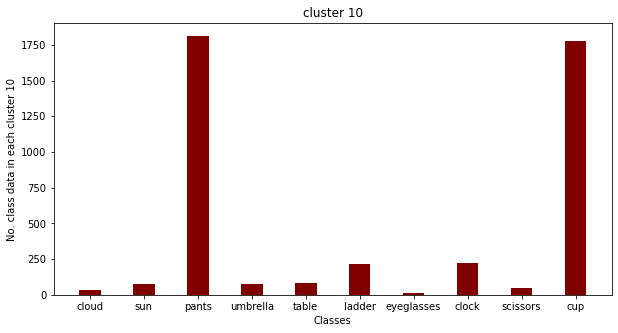

In [273]:
for i in range(len(cluster)):
    fig = plt.figure(figsize = (10, 5))
    height = []
    for num in class_labels:
        height.append(cluster[i].count(num))

    # creating the bar plot
    plt.bar(class_names, height, color ='maroon',width = 0.4)
    plt.xlabel("Classes")
    plt.ylabel("No. class data in each cluster " + str(i+1))
    plt.title("cluster " + str(i+1))
    plt.show()

In [274]:
#Question H

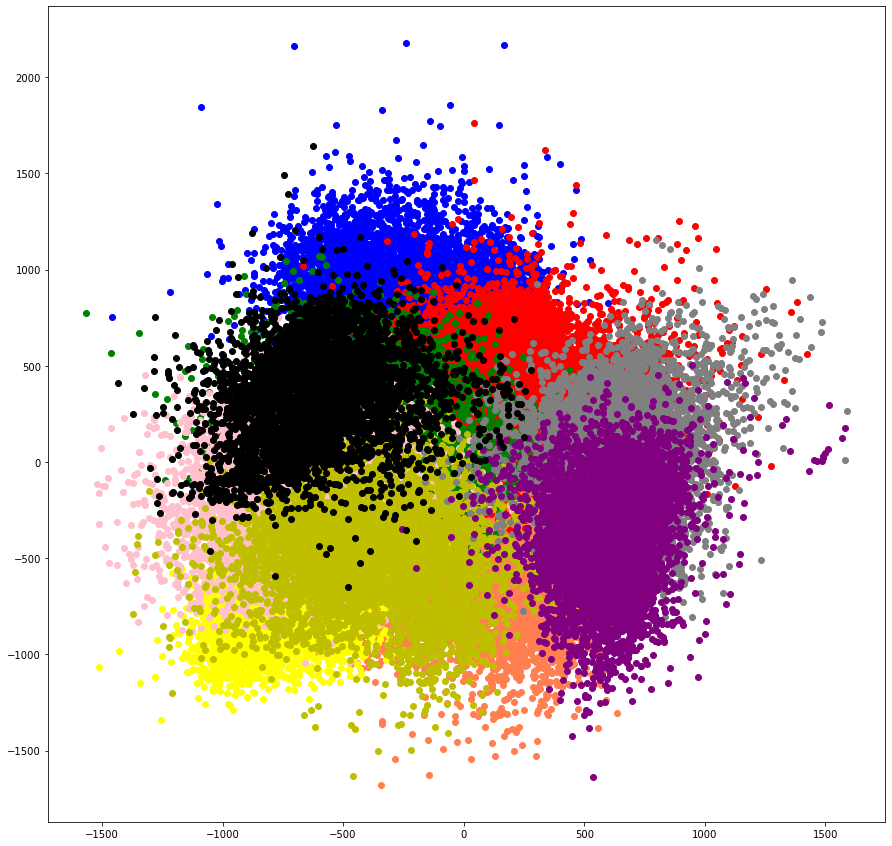

In [275]:
colors = ['coral' , 'blue' , 'red' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'black']
fig = plt.figure(figsize = (15 , 15))
ax = fig.add_subplot()
for c in range(10):
    x = list()
    y = list()

    for i in range(len(points)):
        if f[i] == c:
            x.append(points[i][0])
            y.append(points[i][1])
    ax.scatter(x, y, marker='o', color=colors[c])

plt.show()

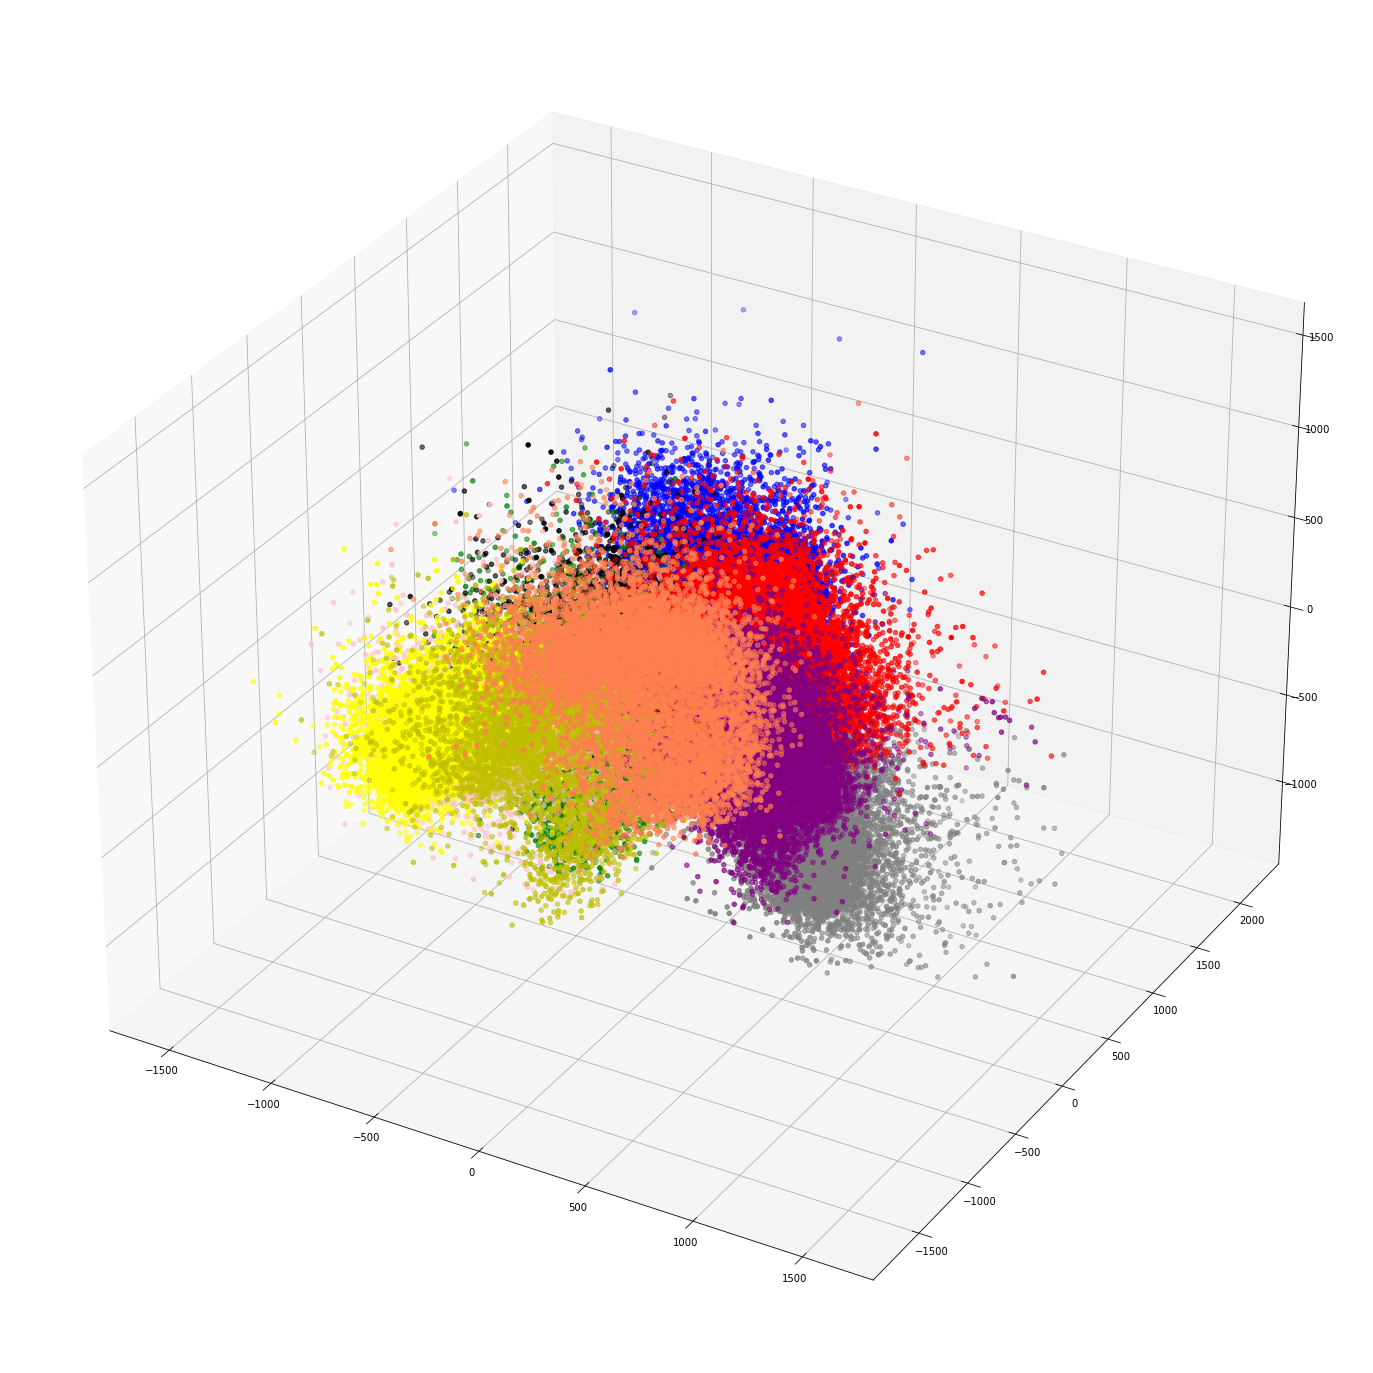

In [284]:
colors = ['coral' , 'blue' , 'red' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'black']
fig = plt.figure(figsize = (25 , 25))
ax = fig.add_subplot(projection='3d')
for c in range(10):
    x = list()
    y = list()
    z = list()
    for i in range(len(points)):
        if f[i] == c:
            x.append(points[i][0])
            y.append(points[i][1])
            z.append(points[i][2])
    ax.scatter(x, y , z, marker='o', color=colors[c])

plt.show()
